In [75]:
import pandas as pd
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

1. Loading, Preporcessing and Cleaning Data

In [76]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [77]:
print(df.isnull().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [78]:
print("Duplicate Rows :",df.duplicated().sum())
df = df.drop_duplicates()

Duplicate Rows : 0


In [79]:
#Here using Dropna, the null values will removed
df = df.dropna()
print(df.isnull().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


In [80]:
#Now remove white space from colume and strings
df.colums = df.columns.str.strip()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].str.strip()
  if 'unnamed: 0' in df.columns:
    df = df.drop(columns=['unnamed: 0'])
    df.info()
print("\n decribe statitics")
print(df.describe())


 decribe statitics
             Rooms         Price     Distance     Postcode     Bedroom2  \
count  6196.000000  6.196000e+03  6196.000000  6196.000000  6196.000000   
mean      2.931407  1.068828e+06     9.751097  3101.947708     2.902034   
std       0.971079  6.751564e+05     5.612065    86.421604     0.970055   
min       1.000000  1.310000e+05     0.000000  3000.000000     0.000000   
25%       2.000000  6.200000e+05     5.900000  3044.000000     2.000000   
50%       3.000000  8.800000e+05     9.000000  3081.000000     3.000000   
75%       4.000000  1.325000e+06    12.400000  3147.000000     3.000000   
max       8.000000  9.000000e+06    47.400000  3977.000000     9.000000   

          Bathroom          Car      Landsize  BuildingArea    YearBuilt  \
count  6196.000000  6196.000000   6196.000000   6196.000000  6196.000000   
mean      1.576340     1.573596    471.006940    141.568645  1964.081988   
std       0.711362     0.929947    897.449881     90.834824    38.105673   


/tmp/ipython-input-80-1406155671.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colums = df.columns.str.strip()


1.1 Training and Testing

In [81]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df_train",df_train.shape)
print("df_test",df_test.shape)

df_train (4647, 21)
df_test (1549, 21)


2.Exploratory Data Analysis

In [82]:
df_test.dtypes

,0
Suburb,object
Address,object
Rooms,int64
Type,object
Price,float64
Method,object
SellerG,object
Date,object
Distance,float64
Postcode,float64


In [83]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtitude  

2.1 EDA Overview

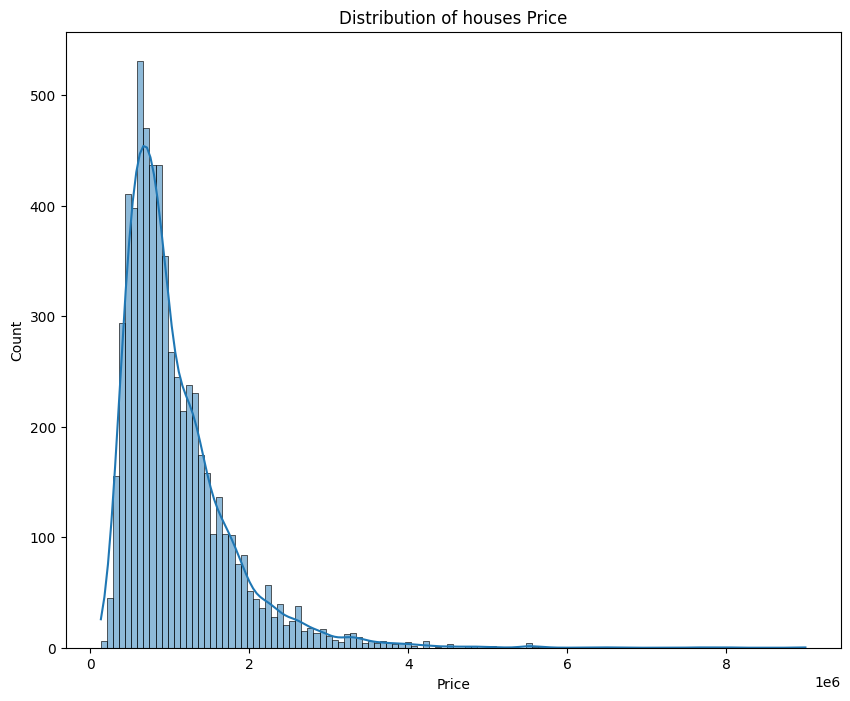

In [84]:
plt.figure(figsize=(10,8))
sns.histplot(df['Price'],kde=True)
plt.title("Distribution of houses Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

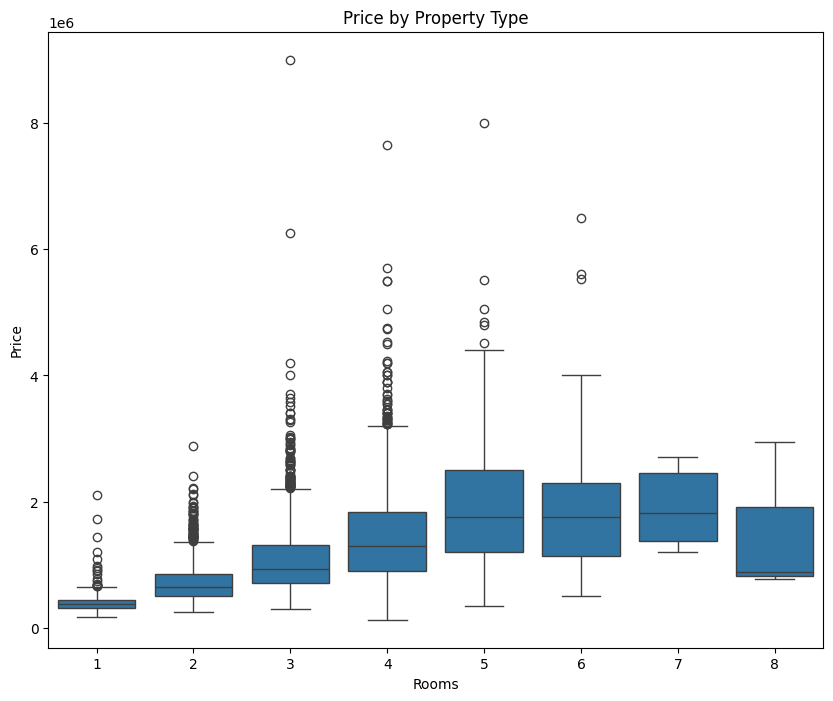

In [85]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Rooms', y = 'Price',data = df)
plt.title("Price by Property Type")
plt.show()

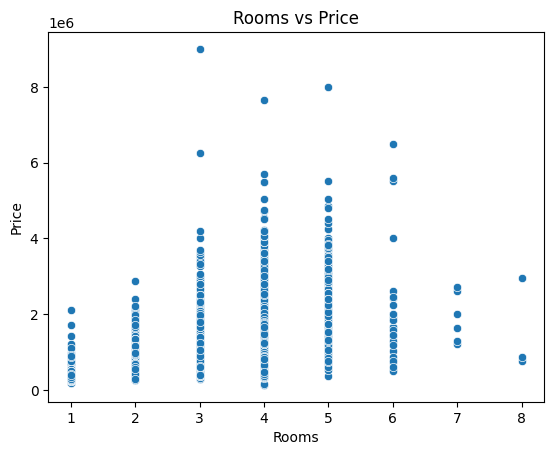

In [86]:
sns.scatterplot(x='Rooms', y='Price', data=df)
plt.title("Rooms vs Price"); plt.show()

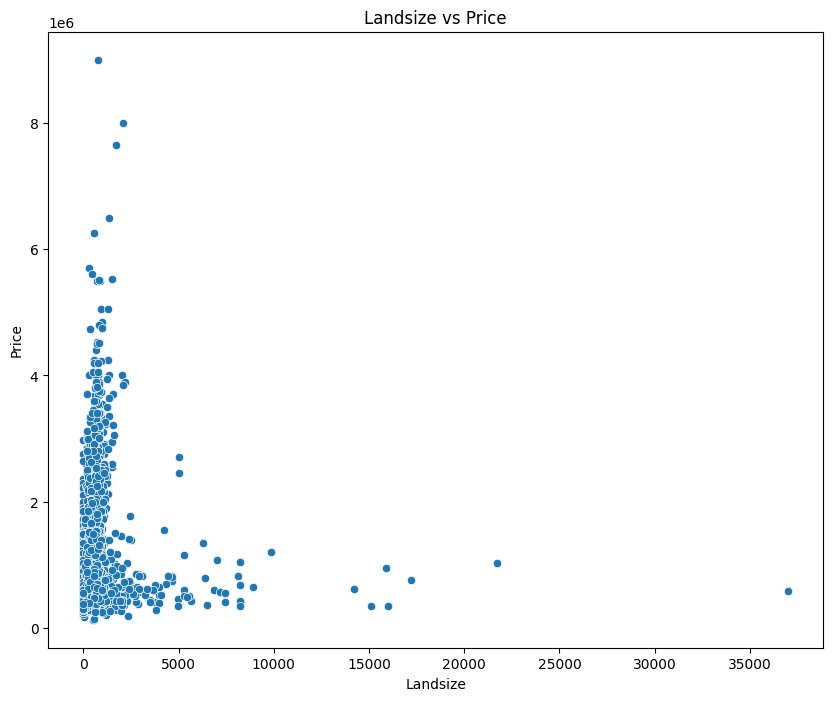

In [87]:
#Landsize vs Price
plt.figure(figsize=(10,8))
sns.scatterplot(x='Landsize', y='Price', data=df)
plt.title("Landsize vs Price");
plt.show()

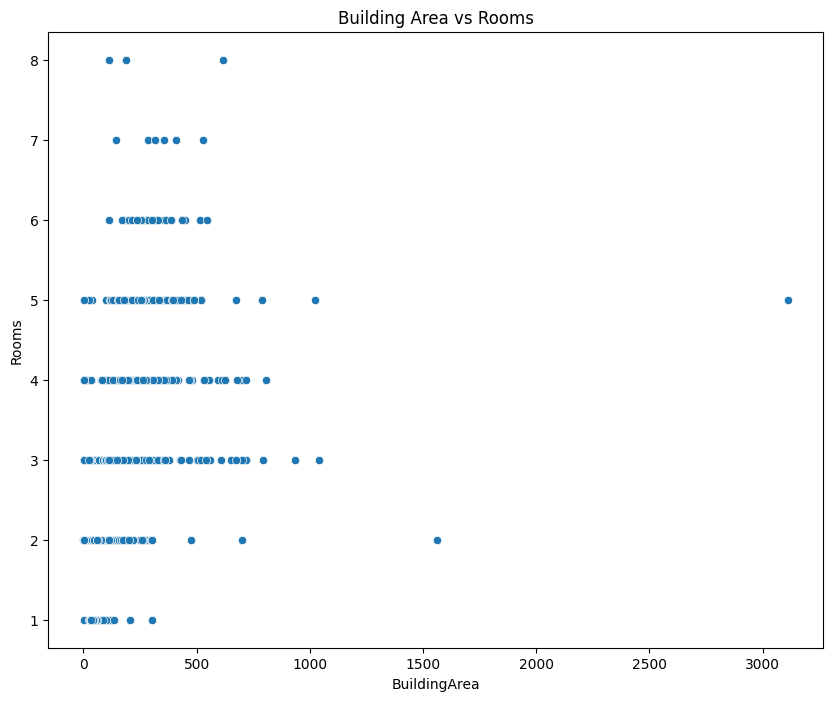

In [88]:
#Building Area vs Rooms
plt.figure(figsize=(10,8))
sns.scatterplot(x='BuildingArea', y='Rooms', data=df)
plt.title("Building Area vs Rooms");
plt.show()

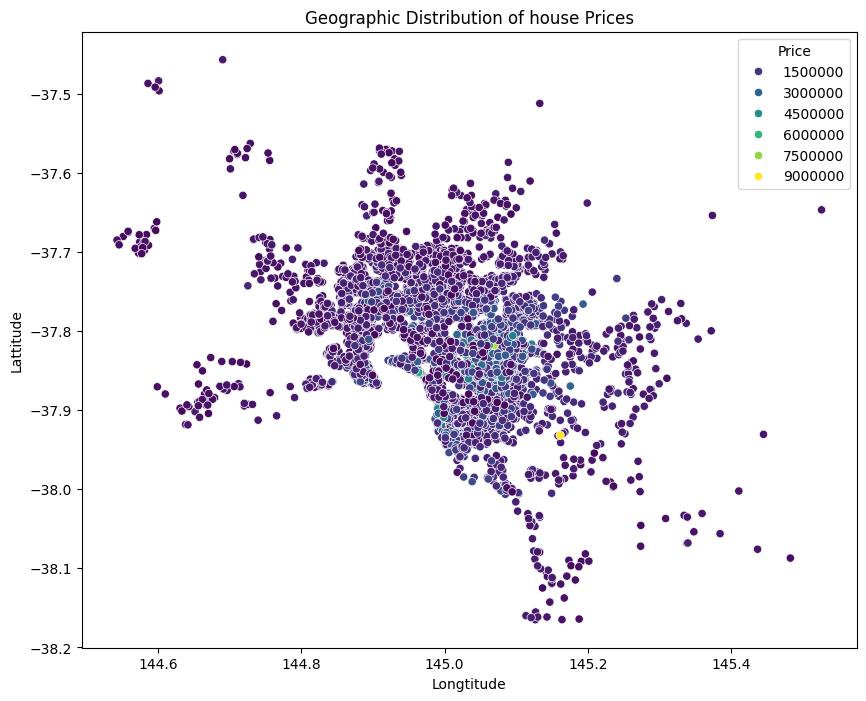

In [89]:
#Geographic Distribution of house Prices
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longtitude', y='Lattitude', hue='Price', data=df, palette = 'viridis')
plt.title("Geographic Distribution of house Prices");
plt.show()

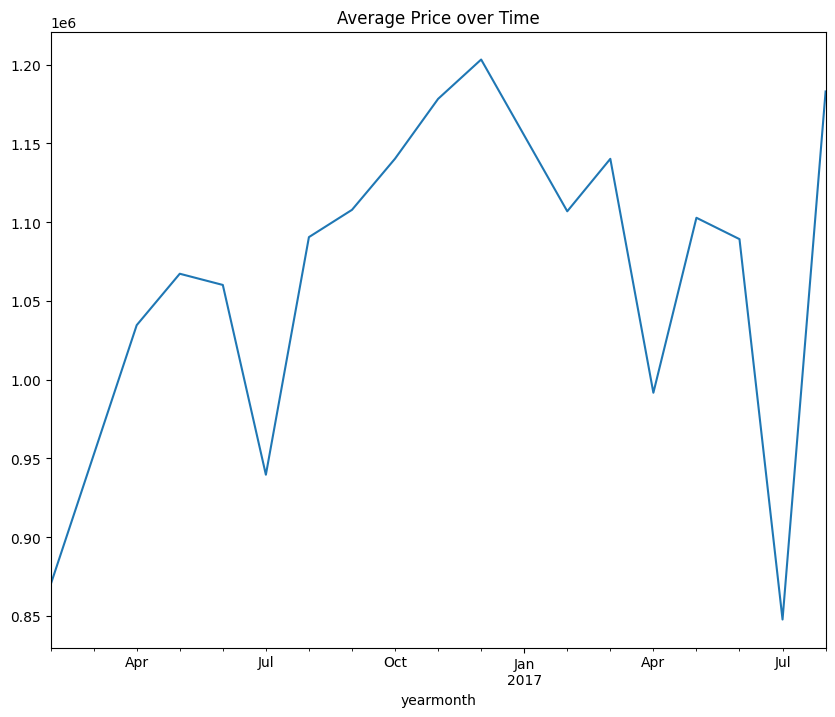

In [90]:
#Average Price over Time
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, format = 'mixed')
df['yearmonth'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('yearmonth')['Price'].mean()
monthly_avg.plot(kind = 'line', figsize = (10,8))
plt.title("Average Price over Time");

Now Train And Test For Model

In [91]:
x = df.drop('Price', axis = 1)
y = df['Price']
#now we only have to taake number not an object types
x = x.select_dtypes(include='number')#we can use exclude = 'Object'
#Now spliting the data set into training and testing Sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 35)
print("x_train :", x_train.shape)
print("x_test :", x_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

x_train : (4956, 12)
x_test : (1240, 12)
y_train : (4956,)
y_test : (1240,)


Model Training And Evaluations

In [92]:
models = {"Linear:": LinearRegression()}
for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    print(f"{name} Results:")
    print(f"  MAE:  {mae:.0f}")
    print(f"  RMSE: {rmse:.0f}")
    print(f"  R²:   {r2:.3f}\n")


Linear: Results:
  MAE:  258527
  RMSE: 422351
  R²:   0.601



4.Reccommondation System

In [93]:
features = ['Rooms', 'Bedroom2', 'Bathroom', 'Car',
            'Landsize', 'BuildingArea', 'Distance',
            'Lattitude', 'Longtitude']
df_rec = df[features].dropna().reset_index(drop=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_rec)
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=min(X_scaled.shape[1], 10), random_state=42)
X_latent = svd.fit_transform(X_scaled)
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(X_latent)
def recommend_similar_properties(index, k=5):
    # similarity scores for property at given index
    sim_scores = similarity_matrix[index]

    # indices of top-k most similar (excluding itself)
    similar_indices = sim_scores.argsort()[::-1][1:k+1]

    return df.iloc[similar_indices][['Suburb', 'Rooms','Car', 'Bathroom', 'Price']]
recommend_similar_properties(100, k=5)

,Suburb,Rooms,Car,Bathroom,Price
179,Altona,2,1.0,2.0,857000.0
7380,South Kingsville,2,1.0,2.0,650000.0
4240,Newport,2,1.0,2.0,740000.0
154,Altona,2,1.0,1.0,510000.0
166,Altona,2,1.0,1.0,447000.0


5.Result

In [94]:
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    m = model.predict(x_test)
    mae  = mean_absolute_error(y_test, m)
    rmse = mean_squared_error(y_test, m) ** 0.5
    r2   = r2_score(y_test, preds)
    results.append([name, mae, rmse, r2])

df_results = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
print(df_results)

     Model            MAE           RMSE        R²
0  Linear:  258527.159107  422350.716444  0.601426
